In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("data/advertising.csv")  
print("Dataset shape:", df.shape)
print(df.head())

# Check missing values
print(df.isnull().sum())

Dataset shape: (200, 4)
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [4]:
# Drop rows with missing target (sales)
df = df.dropna(subset=["Sales"])

# Fill missing numerical values with mean
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include="object").columns.tolist()
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical columns
df = pd.get_dummies(df, drop_first=True)
print("Data after preprocessing shape:", df.shape)

Data after preprocessing shape: (200, 4)


In [5]:
X = df.drop("Sales", axis=1)
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [7]:
models = {"Linear Regression": lr, "Ridge": ridge, "Lasso": lasso}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} => MSE: {mse:.2f}, R2 Score: {r2:.2f}")

Linear Regression => MSE: 2.91, R2 Score: 0.91
Ridge => MSE: 2.91, R2 Score: 0.91
Lasso => MSE: 2.91, R2 Score: 0.91


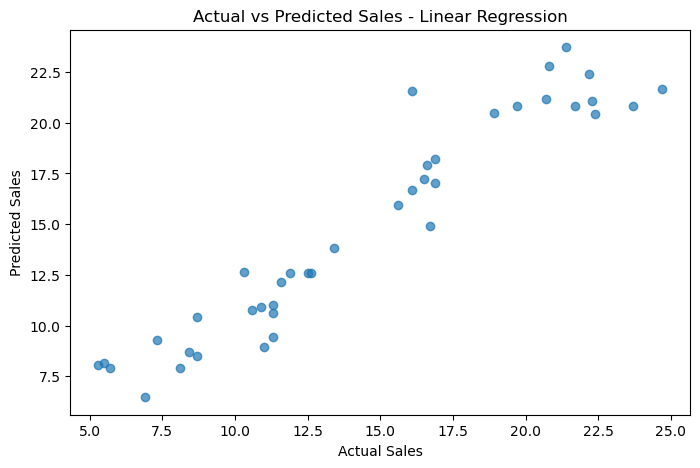

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, lr.predict(X_test), alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales - Linear Regression")
plt.show()